# Análise de Crédito Bancário - Bank Credit Analytics

Análise de inadimplência de crédito para uma instituição financeira.

Esse é um projeto de classificação.

O conjunto de dados utilizado está disponível <a href='https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients'>neste link</a>.

## 1. Entendimento do Negócio

A análise de crédito é um processo que verifica e valida informações de solicitantes de financiamentos, empréstimos e créditos pessoais, identificando os riscos para a instituição que está concedendo o valor solicitado. Com o grande volume de solicitações de crédito, o processo de análise é uma medida de segurança para as empresas garantirem a capacidade financeira de pagamento do solicitante. Realizar uma análise de crédito assertiva evita possíveis danos financeiros, mantendo um fluxo saudável de caixa.

Neste projeto, nosso cliente é uma dessas instituições de crédito. Teremos como principal objetivo desenvolver um modelo de aprendizado de máquina capaz de prever se um cliente ficará ou não inadimplente no próximo mês.

Para alcançar esse objetivo utilizaremos a linguagem Python para a criação e avaliação de diferentes modelos de Machine Learning. 

O resultado final será disponibilizado ao final deste notebook.

### 1.1 Dicionário de Dados

Em relação ao conjunto de dados, as seguintes informações foram disponibilizadas:

- Os dados estão em formato estruturado e serão disponibilizados em um arquivo "xls".
- Os dados financeiros estão em dólares tawaneses.
- Cada registro do conjunto de dados representa a conta de um cliente, sendo assim, não deve haver registros duplicados.

Além disso, também foi disponibilizado o dicionário de dados:

* **`ID`**: identificação da conta do cliente.

* **`LIMIT_BAL`**: valor do crédito fornecido.

* **`SEX`**: sexo do cliente:
    - 1 = masculino.
    - 2 = feminino.

* **`EDUCATION`**: grau de instrução educacional do cliente:
    - 1 = pós graduação.
    - 2 = universidade.
    - 3 = ensino médio.
    - 4 = outros.

* **`MARRIAGE`**: estado civil do cliente:
    - 1 = casado.
    - 2 = solteiro.
    - 3 = outros.
    
* **`AGE`**: idade do cliente.

* **`PAY_1`** a **`PAY_6`**: status do pagamento mensal:
  - -2 = crédito não utilizado.
  - -1 = pagamento em dia.
  - 0 = pagamento mínimo realizado, mas ainda há saldo devedor.
  - 1 a 8 = quantidade de meses de atraso no pagamento.

* **`BILL_AMT1`** a **`BILL_AMT_6`**: valor da fatura mensal. 

* **`PAY_AMT1`** a **`PAY_AMT6`**: valor do pagamento mensal realizado. 

* **`default payment next month`**: variável target:
    - 0 = não inadimplente.
    - 1 = inadimplente.

### 1.2 Estratégia da Solução

O método utilizado para o desenvolvimento do projeto foi o CRISP-DM, aplicado conforme as etapas abaixo:

- **1. Entendimento do Negócio:** nesta etapa inicial, o principal objetivo é compreender o problema de negócio e as necessidades do cliente.


- **2. Entendimento dos Dados:** aqui, iremos realizar um tratamento inicial nos dados a fim de detectar possíveis inconsistências, além disso, iremos explorar as variáveis com o objetivo de entender melhor o que elas representam.


- **3. Engenharia de Atributos:** baseado nos dados existentes, criaremos novas variáveis a fim de resumir as informações e facilitar o aprendizado dos modelos. Além disso, também selecionaremos o conjunto das melhores variáveis.


- **4. Pré-Processamento dos Dados:** nesta etapa, nosso objetivo é preparar os dados para a aplicação do modelo de machine learning, iremos realizar a divisão dos dados em treino e teste, e aplicar técnicas como balanceamento de classes e padronização dos dados.


- **5. Modelagem Preditiva:** iremos testar diferentes algoritmos e escolher o de melhor performance, além de realizar a otimização de seus hiperparâmetros. 


- **7. Conclusões Finais:** por fim, entregaremos o resultado final do projeto.

## 2. Entendimento dos Dados

Vamos iniciar o projeto carregando as bibliotecas e o conjunto de dados.

### 2.1 Bibliotecas Necessárias

In [1]:
# Filtragem das mensagens de avisos.
import warnings
warnings.filterwarnings('ignore') 

# Manipulação de dados.
import numpy as np
import pandas as pd

# Criação de gráficos.
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento dos dados.
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Algoritmos de Machine Learning.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Treinamento dos modelos.
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, StratifiedKFold, train_test_split

# Métricas para avaliação dos modelos.
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import make_scorer, precision_score, recall_score, roc_auc_score

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


In [2]:
# Versão da linguagem Python.
from platform import python_version
print('Versão da linguagem Python:', python_version())

Versão da linguagem Python: 3.7.3


In [3]:
# Versão dos pacotes.
%reload_ext watermark
%watermark --iversions

scipy     : 1.7.3
sklearn   : 1.0.2
matplotlib: 3.5.1
pandas    : 1.3.5
seaborn   : 0.11.2
numpy     : 1.21.5



In [4]:
# Configuração do notebook.

# Plotagens.
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams['lines.linewidth'] = 3

# Estilo dos gráficos.
plt.style.use('ggplot')

# Configuração Dataframe.
pd.set_option('display.max_columns', None)

### 2.2 Tratamento Inicial dos Dados

Nessa etapa, nosso objetivo é realizar uma análise geral no dataset a fim de tratar possíveis inconsistências nos dados.

In [5]:
# Carregando o conjunto de dados.
df = pd.read_excel('data/default of credit card clients.xls')

Criar uma cópia do dataset é uma boa prática para não perdermos o conteúdo original durante a manipulação dos dados.

In [6]:
# Cópia do dataset.
df1 = df.copy()

In [7]:
# Dimensão do dataframe.
df1.shape

(30000, 25)

Temos 30.000 registros e 25 variáveis.

In [8]:
# Visualizando o dataframe.
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# Informações do dataframe.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [10]:
# Valores duplicados.
df1.duplicated().sum()

0

Aparentemente não temos valores ausentes ou duplicados, mas iremos nos certificar disso mais adiante.

Observe que a variável **`PAY_1`** foi carregada como *object*, o que não era esperado conforme informado no dicionário de dados.

In [11]:
# Contagem de registros.
df1['PAY_1'].value_counts()

0                13402
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

3.021 registros possuem a string *Not available* que é a razão pela qual a variável foi carregada como *object*.

Vamos tratar esses registros.

In [12]:
# Máscara booleana.
pay1_booleano = df1['PAY_1'] != 'Not available'
pay1_booleano[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [13]:
# Filtrando os registros.
df1 = df1.loc[pay1_booleano,:].copy()

In [14]:
# Convertendo a variável.
df1['PAY_1'] = df1['PAY_1'].astype('int64')

In [15]:
# Contagem de registros.
df1['PAY_1'].value_counts()

 0    13402
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

Pronto, as strings foram removidas!

Para facilitar a análise, vamos converter as variáveis financeiras que estão em dólares tawaneses para reais.

In [16]:
# Convertendo as variáveis.

# Cotação do dólar taiwanes.
dol_tw = 0.20

# Variáveis financeiras.
fin_vars = ['LIMIT_BAL',
            'BILL_AMT1', 
            'BILL_AMT2', 
            'BILL_AMT3',
            'BILL_AMT4', 
            'BILL_AMT5', 
            'BILL_AMT6',
            'PAY_AMT1', 
            'PAY_AMT2', 
            'PAY_AMT3',
            'PAY_AMT4', 
            'PAY_AMT5', 
            'PAY_AMT6']

In [17]:
# Variáveis antes da conversão.
df1[fin_vars].head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [18]:
# Aplicando a conversão.
df1[fin_vars] = df1[fin_vars].apply(lambda x: x * dol_tw)

In [19]:
# Variáveis após a conversão.
df1[fin_vars].head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,4000.0,782.6,620.4,137.8,0.0,0.0,0.0,0.0,137.8,0.0,0.0,0.0,0.0
1,24000.0,536.4,345.0,536.4,654.4,691.0,652.2,0.0,200.0,200.0,200.0,0.0,400.0
2,18000.0,5847.8,2805.4,2711.8,2866.2,2989.6,3109.8,303.6,300.0,200.0,200.0,200.0,1000.0
3,10000.0,9398.0,9646.6,9858.2,5662.8,5791.8,5909.4,400.0,403.8,240.0,220.0,213.8,200.0
4,10000.0,1723.4,1134.0,7167.0,4188.0,3829.2,3826.2,400.0,7336.2,2000.0,1800.0,137.8,135.8


Por fim, vamos renomear a variável **`default payment next month`**.

In [20]:
# Renomeando a variável.
df1.rename(columns = {'default payment next month': 'TARGET'}, inplace = True)

Realizamos uma análise geral nos dados tratando as principais inconsistências observadas, agora, partiremos para uma análise mais detalhada.

### 2.3 Análise Exploratória

Baseado no dicionário de dados, vamos separar as variáveis.

In [21]:
# Variáveis do dataframe.
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'TARGET'],
      dtype='object')

In [22]:
# Variável de identificação dos clientes.
id = ['ID']

In [23]:
# Variáveis numéricas.
nums = fin_vars.copy()
nums.insert(1, 'AGE')
nums

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [24]:
# Variáveis categóricas.
cats = ['SEX',
        'EDUCATION',
        'MARRIAGE',
        'PAY_1',
        'PAY_2',
        'PAY_3',
        'PAY_4',
        'PAY_5',
        'PAY_6']

In [25]:
# Variável target.
target = ['TARGET']

Também iremos criar subgrupos das variáveis.

In [26]:
# Variáveis de status do pagamento.
pay_sts = ['PAY_1',
           'PAY_2',
           'PAY_3',
           'PAY_4',
           'PAY_5',
           'PAY_6']

In [27]:
# Variáveis de valores das faturas.
bills = ['BILL_AMT1',
         'BILL_AMT2',
         'BILL_AMT3',
         'BILL_AMT4',
         'BILL_AMT5',
         'BILL_AMT6']

In [28]:
# Variáveis de pagamento.
pays = ['PAY_AMT1',
        'PAY_AMT2',
        'PAY_AMT3',
        'PAY_AMT4',
        'PAY_AMT5',
        'PAY_AMT6']

#### 2.3.1 Variável de Identificação dos Clientes

Vamos utilizar a coluna de ID's para verificar a quantidade de registros exclusivos.

In [29]:
# Registros exclusivos.
df1['ID'].nunique()

26704

Inicialmente o conjunto de dados tinha 30.000 registros, desses 3.021 haviam a string *Not available* e foram excluídos.

Sobraram 26.979 registros, e desses 26.704 são registros únicos, ou seja, temos registros que estão repetidos.

Vamos tratar esses registros para que eles não interfiram na análise.

In [30]:
# Contagem de registros.
id_counts = df1['ID'].value_counts()
id_counts.value_counts()

1    26429
2      275
Name: ID, dtype: int64

Temos 275 ID's que estão duplicados.

Vamos identificá-los.

In [31]:
# ID's duplicados.
duple_id = id_counts == 2

# Indíces dos ID's duplicados.
duple_idx = id_counts.index[duple_id]
duple_idx

Index(['d5aeb496-64e5', '443324fb-5cfc', 'f20d8a3d-d047', '693a0664-bde6',
       '8567249b-827e', '590a776e-5049', '2189fc56-f82a', '0913d642-c5d4',
       'af1e3f79-f628', '297edb0f-3bb1',
       ...
       '4dc45e9a-27bd', 'c9826d63-f7d3', 'fc73f07e-eb96', '5f483bdb-3aaf',
       '93b2c5f7-acea', '47d9ee33-0df0', '26bde6da-f148', 'f63d8fbe-d79e',
       'dda76366-a407', 'c3ddce11-35e2'],
      dtype='object', length=275)

Agora temos o objeto *duple_idx* contendo os ID's dos registros duplicados.

Podemos aplicar um filtro no dataframe para visualizá-los.

In [32]:
# ID's duplicados.
df1.loc[df1['ID'].isin(duple_idx[0:5]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
541,d5aeb496-64e5,30000.0,2,1,2,28,1,-2,-2,-2,-2,-1,0.0,0.0,0.0,0.0,0.0,63.6,0.0,0.0,0.0,0.0,63.6,0.0,0
641,d5aeb496-64e5,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10491,8567249b-827e,100000.0,1,1,2,38,0,0,0,0,0,0,95493.6,97616.6,99767.8,82364.0,84534.2,78919.8,4200.0,4560.0,3040.0,3800.0,3200.0,2000.0,0
10591,8567249b-827e,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19575,443324fb-5cfc,42000.0,2,1,1,31,0,0,0,0,0,0,31508.8,32087.4,25849.4,23915.8,24063.6,21424.4,1501.0,1414.4,801.8,1600.0,2000.0,2400.0,0
19675,443324fb-5cfc,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21274,693a0664-bde6,10000.0,1,3,2,51,1,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21374,693a0664-bde6,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27419,f20d8a3d-d047,10000.0,1,1,1,45,-1,-1,-1,-1,-1,-1,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,1
27519,f20d8a3d-d047,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Aparentemente cada ID duplicado parece ter um registro de dados válidos e um somente com zeros.

Se temos ID's duplicados com valores zeros, também é viável verificar se temos ID's únicos contendo esses valores.

Para isso, iremos criar uma dataframe booleano baseado em todo o conjunto de dados.

In [33]:
# Dataframe booleano.
# True = 0, False = outro valor.
df_booleano = df1 == 0
df_booleano.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True


O objetivo é identificar os registros que possuem *True* para todas as variáveis.

In [34]:
# Identificando os registros.
# True = registros inválidos, False = registros válidos.
df_zero = df_booleano.iloc[:,1:].all(axis = 1)

# Total de registros inválidos.
sum(df_zero)

315

315 registros possuem zeros em todas as variáveis, ou seja, além dos 275 registros duplicados, também temos registros únicos com essa característica.

In [35]:
# Filtrando os registros.
df2 = df1.loc[~df_zero,:].copy()

In [36]:
# Registros únicos.
df2['ID'].nunique()

26664

In [37]:
# Dimensão do dataframe.
df2.shape

(26664, 25)

Identificamos e eliminamos os registros com índices duplicados e também os que continham zero para todas as variáveis.

#### 2.3.2 Variáveis Numéricas

In [38]:
# Estatísticas das variáveis.
df2[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,26664.0,33583.810981,25967.890616,2000.0,10000.00,28000.0,48000.00,160000.0
AGE,26664.0,35.505213,9.227442,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,26664.0,10281.146145,14726.737421,-33116.0,716.00,4472.2,13529.95,149362.8
BILL_AMT2,26664.0,9860.000300,14186.909907,-13955.4,599.95,4230.0,12879.10,134312.6
BILL_AMT3,26664.0,9405.268009,13741.071905,-31452.8,525.45,4015.9,12072.00,171017.2
BILL_AMT4,26664.0,8667.778908,12855.050148,-34000.0,468.35,3807.4,10945.50,141372.8
BILL_AMT5,26664.0,8067.627340,12141.188817,-16266.8,349.00,3613.2,10058.10,164708.0
BILL_AMT6,26664.0,7777.974467,11886.508331,-67920.6,251.20,3401.0,9850.75,139988.8
PAY_AMT1,26664.0,1140.817154,3339.879726,0.0,200.00,422.9,1005.40,174710.4
PAY_AMT2,26664.0,1176.221970,4242.861970,0.0,160.40,401.4,1000.00,245416.4


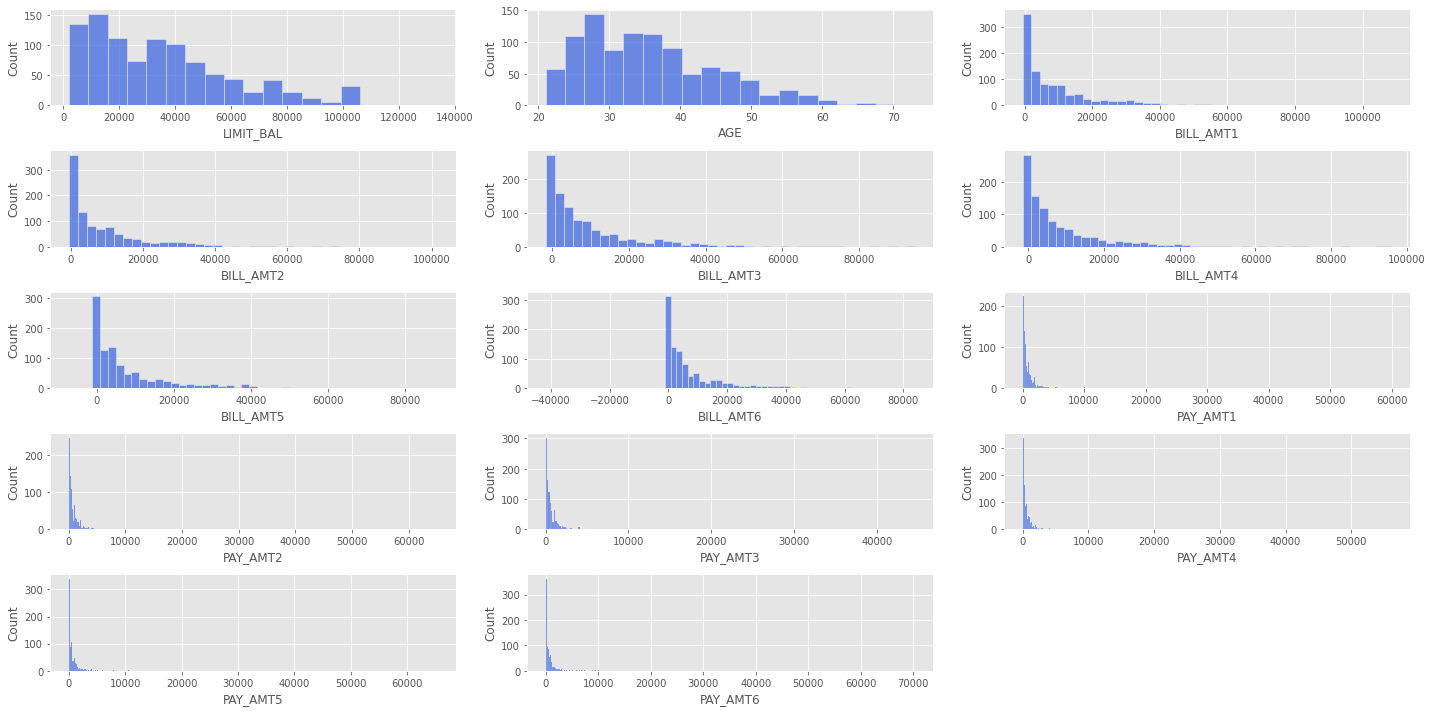

In [39]:
# Histogramas das variáveis.

# Amostra dos dados.
df_sample = df2.sample(1000, random_state = 42)

# Redefinindo a área de plotagem.
plt.figure(figsize = (20, 10))

# Especificando as variáveis.
features = nums

# Plotagem.
for i in range(0, len(nums)):
    plt.subplot(5, 3, i + 1)
    sns.histplot(x = df_sample[features[i]],
                 color = 'royalblue')
    plt.xlabel(features[i])
    plt.tight_layout()

- As variáveis **`LIMIT_BAL`** e **`AGE`** estão corretas, não há valores abaixo de zero.

- As variáveis **`BILL_AMT`** parecem corretas, as faturas possuem valores "normais", sendo que os valores negativos indicam um crédito para o titular.

- Para as variáveis **`PAY_AMT`** precisaremos aplicar a transformação logarítma para facilitar a visualização.

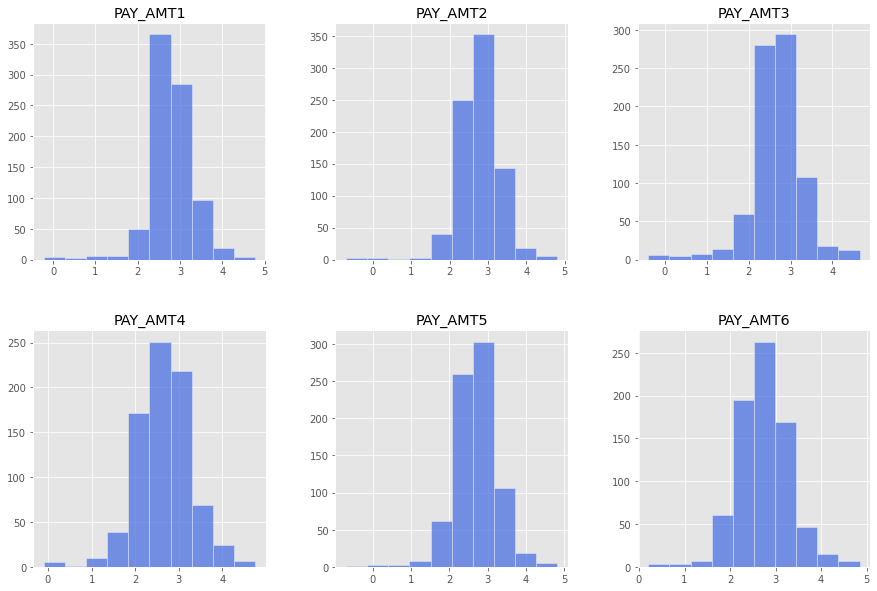

In [40]:
# Histogramas das variáveis.

# Filtrando os dados.
pay_zero_mask = df_sample[pays] == 0

# Plotagem.
df_sample[pays][~pay_zero_mask].apply(np.log10).hist(layout = (2, 3),
                                                     ec = 'w',
                                                     alpha = .7, 
                                                     color = 'royalblue');

- Aparentemente as variáveis estão corretas, a distribuição dos pagamentos parecem bem consistentes de um mês para o outro.

#### 2.3.3 Variáveis Categóricas

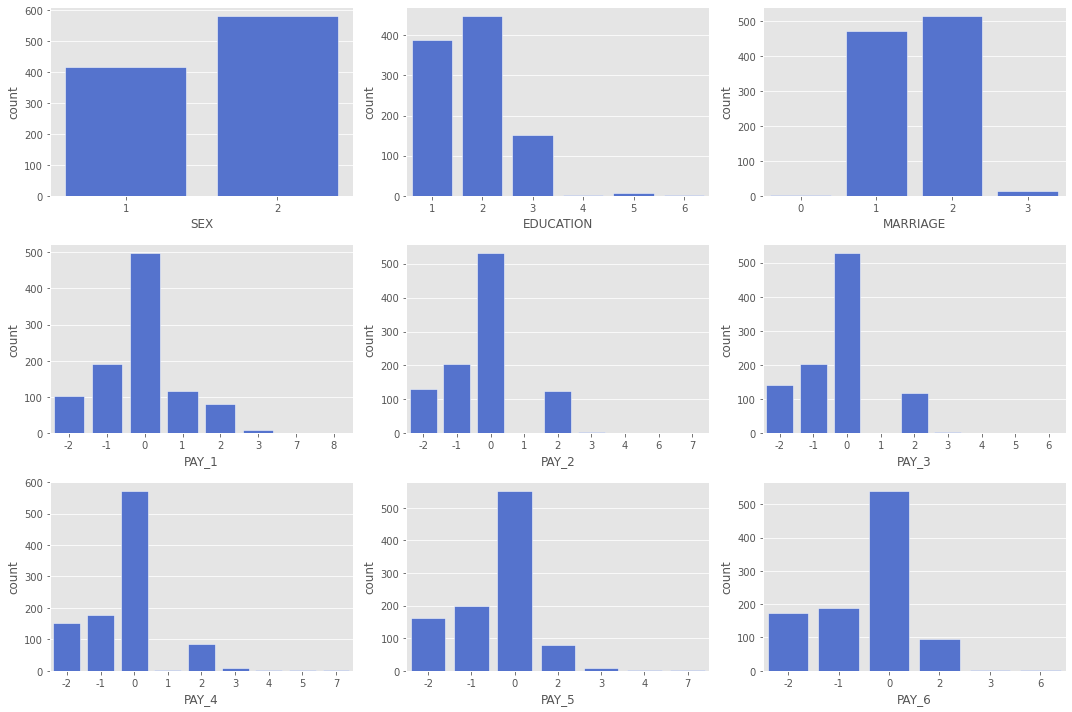

In [41]:
# Plotagem das variáveis.
for i in range(0, len(cats)):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x = df_sample[cats[i]], 
                  color = 'royalblue',
                  ec = 'w')
    plt.tight_layout()

- As variáveis **`EDUCATION`**, **`MARRIAGE`**, possuem valores não documentados no dicionário de dados.
- Com excessão da **`PAY_1`**, as demais variáveis de status do pagamento não possuem o valor 1, indicando atraso de 1 mês no pagamento da fatura, mas possuem o valor 2, indicando o atraso de 2 meses, o que não faz sentido.

In [42]:
# Tratando as inconsistências observadas.

# Variável EDUCATION.
df2['EDUCATION'].replace(to_replace = [0, 5, 6], value = 4, inplace = True)

# Variável MARRIAGE.
df2['MARRIAGE'].replace(to_replace = 0, value = 3, inplace = True)

- Para a variável **`EDUCATION`** agrupamos os valores 0, 5 e 6 na categoria 4.
- Para a variável **`MARRIAGE`** agrupamos o valor 0 na categoria 3.

Vamos analisar as variáveis de status de pagamento.

In [43]:
# Comparando as variáveis.
df2.loc[df2['PAY_2'] == 2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


A saída acima, fica claro que os dados dessas variáveis não batem.

A única forma de chegarmos a um atraso de 2 meses seria havendo um atraso de 1 mês no mês anterior, o que não ocorre.

Em casos como esse, deveríamos consultar a empresa para verificar quais procedimentos tomar em relação a essa situação. 

Teríamos basicamente 2 opções:

- Tentar resgatar os registros originais das variáveis.
- Descartar as variáveis da análise.

Como se trata de uma variável categórica e que indica o status de pagamento de cada cliente, iremos optar pela segunda opção.

Portanto, de todas as variáveis de status de pagamentos, utilizaremos somente a **`PAY_1`**.

In [44]:
# Tratando as inconsistências observadas.
df2 = df2.drop(['PAY_2',
                'PAY_3',
                'PAY_4',
                'PAY_5',
                'PAY_6'], axis = 1);

In [45]:
# Redefinindo a lista de variáveis categóricas.
cats2 = ['SEX',
         'EDUCATION', 
         'MARRIAGE', 
         'PAY_1']

#### 2.3.4 Variável Target

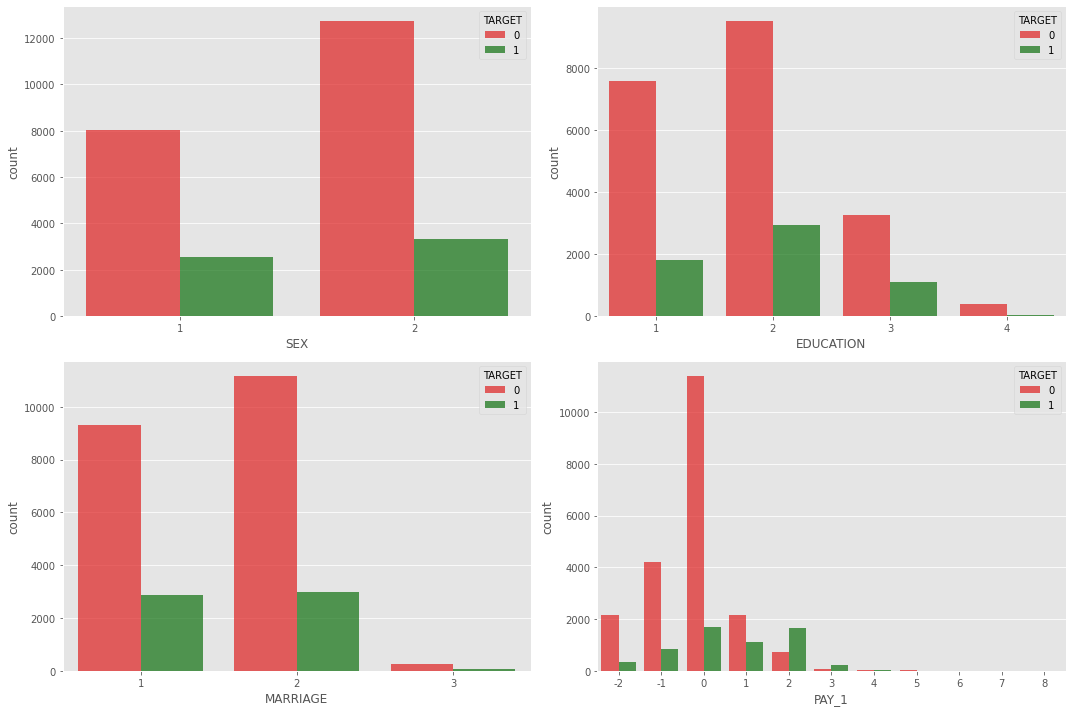

In [46]:
# Variáveis em relação a target.

# Especificando as variáveis.
features = cats2

# Plotagem.
for i in range(0, len(features)):
    plt.subplot(2, 2, i + 1) 
    sns.countplot(data = df2, 
                  x = features[i], 
                  hue = 'TARGET', 
                  alpha = .7,
                  palette = ['red', 'green'])
    plt.tight_layout()

#### 2.3.5 Perguntas de Negócio

Agora que entendemos o que cada variável representa, vamos criar algumas perguntas de négocio.

- **P1.** O limite de crédito fornecido impacta na taxa de inadimplência?
- **P2.** Clientes inadimplentes tendem a inadimplir novamente? 
- **P3.** Há diferenças significativas na taxa de inadimpência baseado no grau de instrução educacional?

Para responder a primeira pergunta, criaremos uma nova variável baseada na **`LIMIT_BAL`**.

In [47]:
# Valor mínimo da variável.
df2['LIMIT_BAL'].min()

2000.0

In [48]:
# Valor máximo da variável.
df2['LIMIT_BAL'].max()

160000.0

Com base nos valores mínimo e máximo da variável, agruparemos os clientes conforme as regras abaixo:

- Limite de crédito de 0 a 30.000 receberá o valor ***1***.
- Limite de crédito de 30.000 a 60.000 receberá o valor ***2***.
- Limite de crédito de 60.000 a 90.000 receberá o valor ***3***.
- Limite de crédito de 90.000 a 200.000 receberá o valor ***4***.

In [49]:
# Definindo os valores e labels.
bins = [0, 30000, 60000, 90000, 200000]
labels = [1, 2, 3, 4]

In [50]:
# Criando a variável.
df2['GROUP_LIMIT'] = pd.cut(df2['LIMIT_BAL'],
                            bins, 
                            labels = labels).astype('int64')

In [51]:
# Visualizando amostras aleatórias.
df2[['LIMIT_BAL', 'GROUP_LIMIT']].sample(5)

,LIMIT_BAL,GROUP_LIMIT
6654,38000.0,2
20814,36000.0,2
818,30000.0,1
27327,4000.0,1
13118,28000.0,1


In [52]:
# Contagem de registros.
df2['GROUP_LIMIT'].value_counts()

1    14510
2     8074
3     2982
4     1098
Name: GROUP_LIMIT, dtype: int64

A partir dessa variável, vamos verificar a porcentagem de inadimplência de cada classe.

Para isso, vamos realizar uma série de agrupamento nos dados.

In [53]:
# Agrupando os dados.
df_group = df2.groupby('TARGET').agg({'ID':'nunique'}).reset_index() 
df_group

,TARGET,ID
0,0,20750
1,1,5914


Esse primeiro agrupamento é basicamente a contagem de registros para cada classe da variável target.

Vamos "desmembrar" essa informação baseado na variável **`GROUP_LIMIT`**.

In [54]:
# Agrupando os dados.
df_group2 = df2.groupby(['TARGET','GROUP_LIMIT']).agg({'ID':'nunique'}).reset_index()
df_group2

,TARGET,GROUP_LIMIT,ID
0,0,1,10487
1,0,2,6731
2,0,3,2561
3,0,4,971
4,1,1,4023
5,1,2,1343
6,1,3,421
7,1,4,127


Acima temos a quantidade de registros para cada categoria baseado nas classes da variável target.

Vamos concatenar esses dois dataframes.

In [55]:
# Concatenando os dados.
df_group3 = df_group2.merge(df_group, on = 'TARGET')
df_group3

,TARGET,GROUP_LIMIT,ID_x,ID_y
0,0,1,10487,20750
1,0,2,6731,20750
2,0,3,2561,20750
3,0,4,971,20750
4,1,1,4023,5914
5,1,2,1343,5914
6,1,3,421,5914
7,1,4,127,5914


O próximo passa é agrupar os dados pela variável **`GROUP_LIMIT`**.

In [56]:
# Agrupando os dados.
df_group4 = df2.groupby('GROUP_LIMIT').agg({'ID':'nunique'}).reset_index() 
df_group4

,GROUP_LIMIT,ID
0,1,14510
1,2,8074
2,3,2982
3,4,1098


In [57]:
# Concatenando os dados.
df_group5 = df_group2.merge(df_group4, on = 'GROUP_LIMIT')
df_group5

,TARGET,GROUP_LIMIT,ID_x,ID_y
0,0,1,10487,14510
1,1,1,4023,14510
2,0,2,6731,8074
3,1,2,1343,8074
4,0,3,2561,2982
5,1,3,421,2982
6,0,4,971,1098
7,1,4,127,1098


Para obtermos o percentual, basta realizar uma simples operação entre as colunas **`ID_x`** e **`ID_y`**.

In [58]:
# Coluna de percentual.
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100

# Renomeando as colunas.
df_group5.columns = ['Status do Cliente', 
                     'Categoria do Cliente',
                     'Total Por Categoria', 
                     'Total Geral', 
                     'Percentual(%)']

# Visualizando o dataframe.
df_group5

,Status do Cliente,Categoria do Cliente,Total Por Categoria,Total Geral,Percentual(%)
0,0,1,10487,14510,72.274294
1,1,1,4023,14510,27.725706
2,0,2,6731,8074,83.366361
3,1,2,1343,8074,16.633639
4,0,3,2561,2982,85.881958
5,1,3,421,2982,14.118042
6,0,4,971,1098,88.433515
7,1,4,127,1098,11.566485


Vamos visualizar essa informação de maneira gráfica.

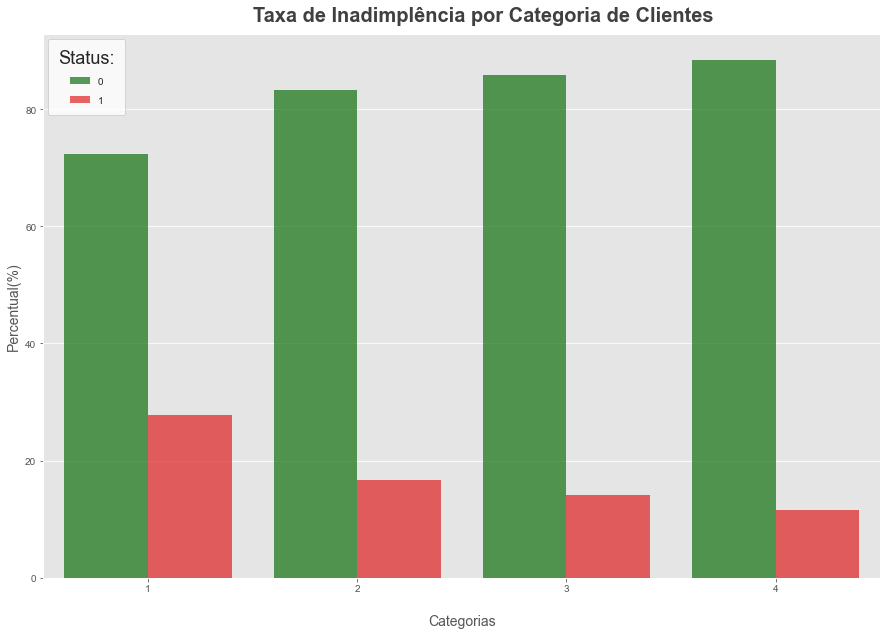

In [59]:
# Gráfico para a pergunta 1.

# Chart.
chart = sns.barplot(x = 'Categoria do Cliente', 
                    y = 'Percentual(%)', 
                    data = df_group5, 
                    hue = 'Status do Cliente', 
                    alpha = .7,
                    palette = ['green', 'red'])
# Título.
chart.text(x = 0.5, 
           y = 95, 
           s = 'Taxa de Inadimplência por Categoria de Clientes',
           fontsize = 20, 
           weight = 'bold', 
           alpha = .75)

# Estilo e labels.
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('\nCategorias', fontsize = 14)
chart.set_ylabel('Percentual(%)', fontsize = 14)

# Legenda.
plt.legend(loc = 'upper left', 
           borderpad = 1.0, 
           labelspacing = 1.0, 
           fontsize = 10, 
           title = 'Status:');

Pergunta 1: 

- **P1.** O limite de crédito fornecido impacta na taxa de inadimplência?
    - Sim, podemos ver que a medida que o limite de crédito aumenta, a taxa de inadimplência diminui;
    - A categoria 1, possui uma taxa de inadimplência quase 3 vezes maior que a categoria 4.
    
Para responder a pergunta 2 utilizaremos a variável **`PAY_1`** que representa o status do cliente.

In [60]:
# Taxa de inadimplência por status.
data = df2.groupby('PAY_1').agg({'TARGET':np.mean})

In [61]:
# Taxa geral de inadimplência.
data['Taxa Geral de Inadimplência'] = tx_target = df2['TARGET'].mean()

In [62]:
# Renomeando a coluna.
data.rename(columns = {'TARGET': 'Taxa de Inadimplência por Status'}, inplace = True)
data

,Taxa de Inadimplência por Status,Taxa Geral de Inadimplência
PAY_1,,
-2,0.131664,0.221797
-1,0.170002,0.221797
0,0.128295,0.221797
1,0.336400,0.221797
2,0.694701,0.221797
3,0.773973,0.221797
4,0.682540,0.221797
5,0.434783,0.221797
6,0.545455,0.221797


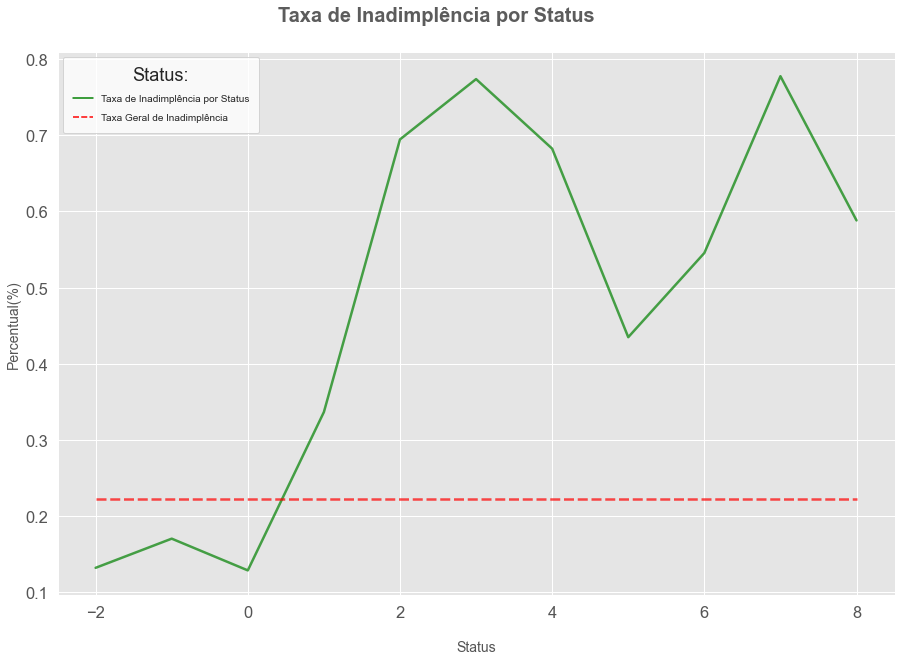

In [63]:
# Gráfico para a pergunta 2.

# Chart.
chart = sns.lineplot(data = data, 
                     alpha = .7,
                     palette = ['green', 'red'], 
                     linewidth = 2.5)

# Título.
chart.text(x = 0.40, 
           y = 0.85, 
           s = 'Taxa de Inadimplência por Status',
           fontsize = 20, 
           weight = 'bold', 
           alpha = .75)

# Estilo e labels.
sns.set(font_scale = 1.5)
chart.set_xlabel('\nStatus', fontsize = 14)
chart.set_ylabel('Percentual(%)', fontsize = 14)

# Legenda.
plt.legend(loc = 'upper left', 
           facecolor = 'w',
           borderpad = 1.0, 
           labelspacing = 1.0, 
           fontsize = 10, 
           title = 'Status:');

Pergunta 2: 

- **P2.** Clientes inadimplentes tendem a inadimplir novamente?
    - Sim, podemos ver que clientes inadimplentes (valores a partir de 1) apresentam maiores probabilidades de inadimplir novamente. 
    - De acordo com a análise, pelo menos 30% das contas que estavam inadimplentes no último mês (valor 1), estarão inadimplentes novamente.
    - Por outro lado, as contas em boa situação (-2, -1, e 0) estão bem abaixo da taxa geral de inadimplência.
    
Para responder a pergunta 3 vamos realizar o mesmo procedimento realizado na pergunta 1.

In [64]:
# Agrupando os dados.
df_group6 = df2.groupby('TARGET').agg({'ID':'nunique'}).reset_index() 
df_group6

,TARGET,ID
0,0,20750
1,1,5914


In [65]:
# Agrupando os dados.
df_group7 = df2.groupby(['TARGET','EDUCATION']).agg({'ID':'nunique'}).reset_index()
df_group7

,TARGET,EDUCATION,ID
0,0,1,7587
1,0,2,9519
2,0,3,3261
3,0,4,383
4,1,1,1825
5,1,2,2939
6,1,3,1119
7,1,4,31


In [66]:
# Concatenando os dados.
df_group8 = df_group7.merge(df_group, on = 'TARGET')
df_group8

,TARGET,EDUCATION,ID_x,ID_y
0,0,1,7587,20750
1,0,2,9519,20750
2,0,3,3261,20750
3,0,4,383,20750
4,1,1,1825,5914
5,1,2,2939,5914
6,1,3,1119,5914
7,1,4,31,5914


In [67]:
# Agrupando os dados.
df_group9 = df2.groupby('EDUCATION').agg({'ID':'nunique'}).reset_index() 
df_group9

,EDUCATION,ID
0,1,9412
1,2,12458
2,3,4380
3,4,414


In [68]:
# Concatenando os dados.
df_group10 = df_group7.merge(df_group9, on = 'EDUCATION')
df_group10

,TARGET,EDUCATION,ID_x,ID_y
0,0,1,7587,9412
1,1,1,1825,9412
2,0,2,9519,12458
3,1,2,2939,12458
4,0,3,3261,4380
5,1,3,1119,4380
6,0,4,383,414
7,1,4,31,414


In [69]:
# Coluna de percentual.
df_group10['Percentual(%)'] = df_group10['ID_x'] / df_group10['ID_y'] * 100

# Renomeando as colunas.
df_group10.columns = ['Status do Cliente', 
                      'Grau Educacional', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']

# Visualizando o dataframe.
df_group10

,Status do Cliente,Grau Educacional,Total Por Categoria,Total Geral,Percentual(%)
0,0,1,7587,9412,80.609860
1,1,1,1825,9412,19.390140
2,0,2,9519,12458,76.408733
3,1,2,2939,12458,23.591267
4,0,3,3261,4380,74.452055
5,1,3,1119,4380,25.547945
6,0,4,383,414,92.512077
7,1,4,31,414,7.487923


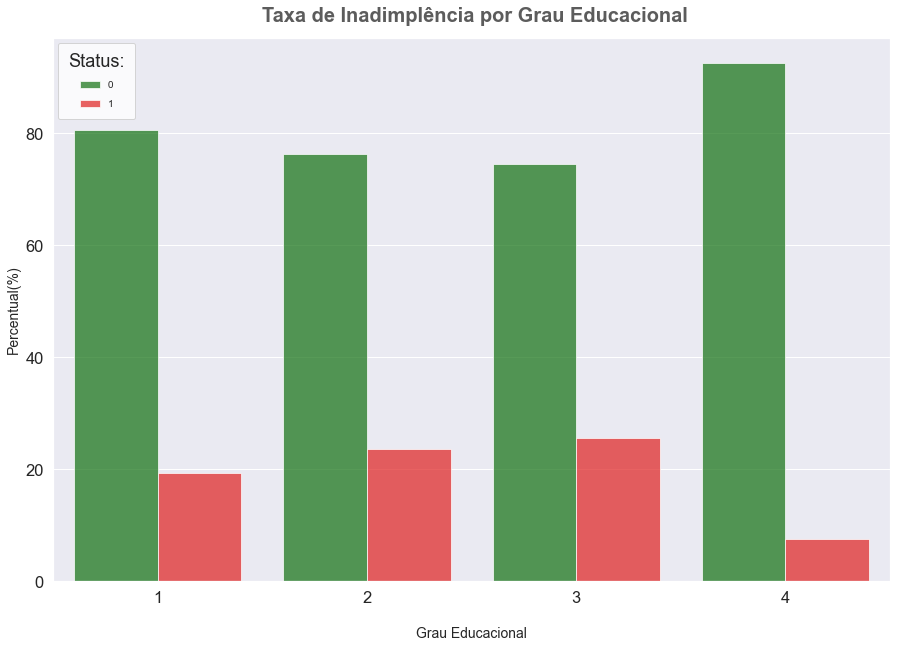

In [70]:
# Gráfico para a pergunta 3.

# Chart.
chart = sns.barplot(x = 'Grau Educacional', 
                    y = 'Percentual(%)', 
                    data = df_group10, 
                    hue = 'Status do Cliente', 
                    alpha = .7,
                    palette = ['green', 'red'])
# Título.
chart.text(x = 0.5, 
           y = 100, 
           s = 'Taxa de Inadimplência por Grau Educacional',
           fontsize = 20, 
           weight = 'bold', 
           alpha = .75)

# Estilo e labels.
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('\nGrau Educacional', fontsize = 14)
chart.set_ylabel('Percentual(%)', fontsize = 14)

# Legenda.
plt.legend(loc = 'upper left', 
           borderpad = 1.0, 
           labelspacing = 1.0, 
           fontsize = 10, 
           title = 'Status:');

Pergunta 3: 

- **P3.** Há diferenças significativas na taxa de inadimpência baseado no grau de instrução educacional?
    - Não, embora haja uma diferença entre as classes, ela não é significativa.
    - A classe 4 (Outros) é a que demonstra a menor taxa de inadimplência.

#### 2.3.6 Checando Outliers

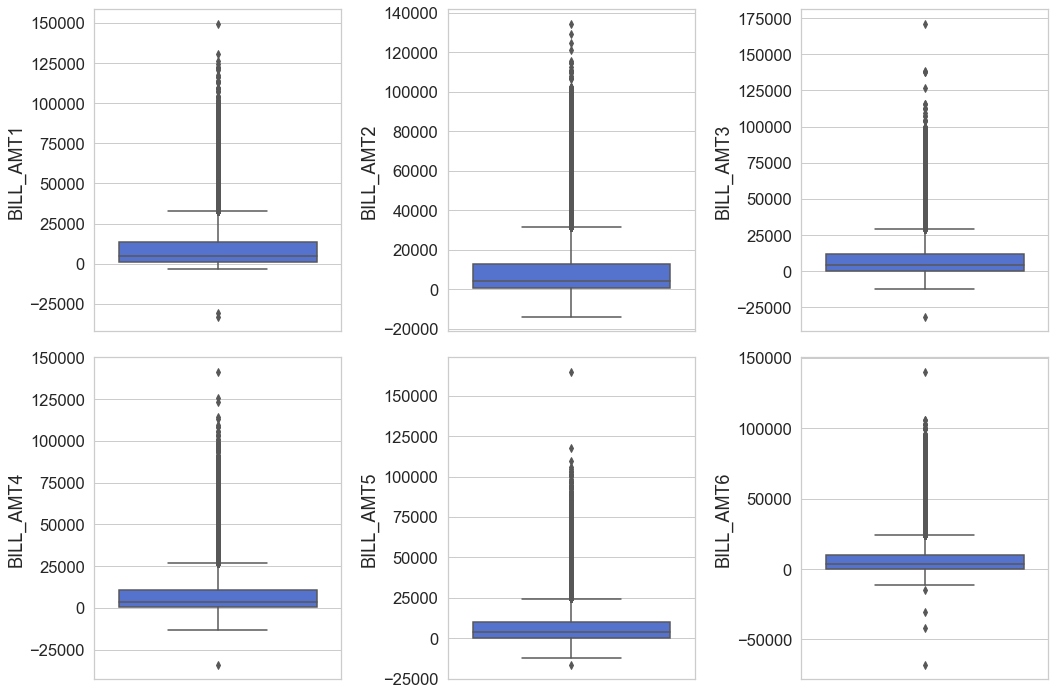

In [71]:
# Boxplots das variáveis.

# Especificando as variáveis.
features = bills

# Plotagem.
for i in range(0, len(features)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y = df2[features[i]], 
                color = 'royalblue', 
                orient = 'v')
    plt.tight_layout()

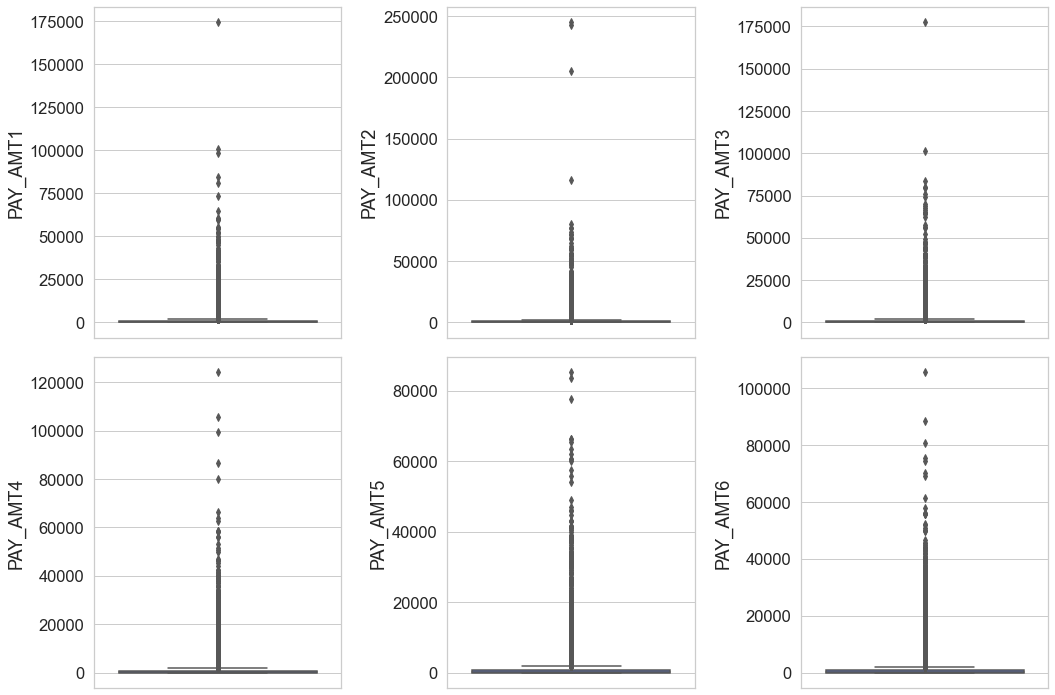

In [72]:
# Boxplots das variáveis.

# Especificando as variáveis.
features = pays

# Plotagem.
for i in range(0, len(features)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y = df2[features[i]], 
                color = 'royalblue', 
                orient = 'v')
    plt.tight_layout()

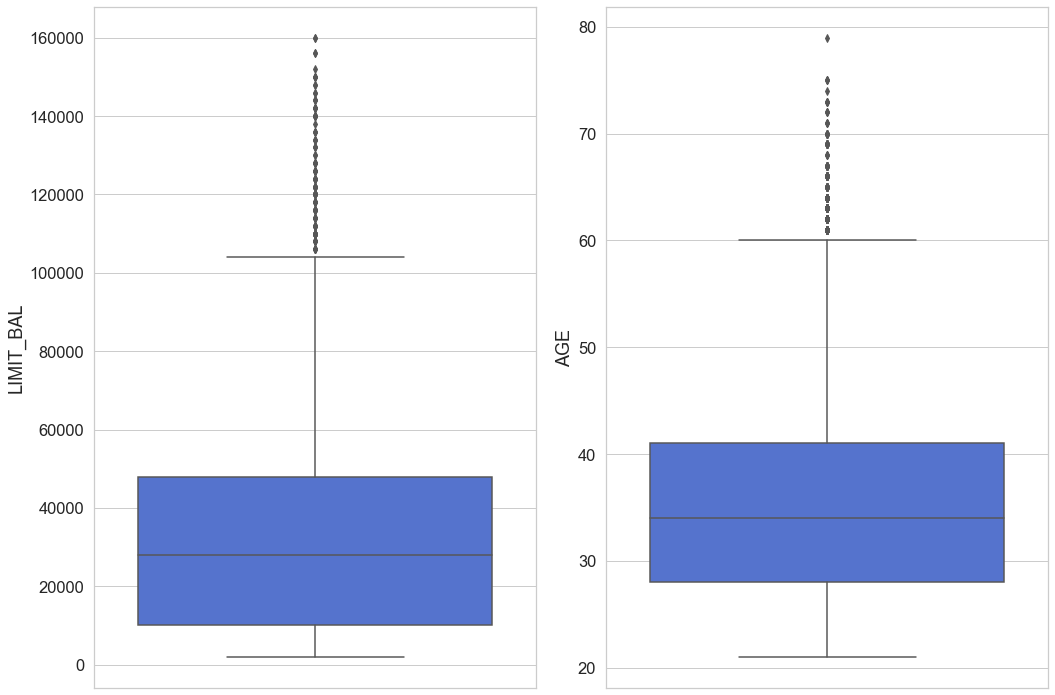

In [73]:
# Boxplots das variáveis.
sub_vars = ['LIMIT_BAL', 'AGE']

# Especificando as variáveis.
features = sub_vars

# Plotagem.
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df2[features[i]], 
                color = 'royalblue', 
                orient = 'v')
    plt.tight_layout()

Todas as variáveis possuem valores *outliers* que precisarão de tratamento.

Para realizar o tratamento utilizaremos o *Z-Score*.

*Z-scores* são o número de desvios padrão acima e abaixo da média. 

Por exemplo, um escore Z de 2 indica que uma observação está dois desvios padrão acima da média, enquanto um escore Z de -2  significa que está dois desvios padrão abaixo da média. Um *Z-score* de zero representa um valor que é igual à média.

Um valor de corte padrão para encontrar valores discrepantes são escores Z de +/-3.

In [74]:
# Variáveis para o tratamento.
vars_out = pays + bills + sub_vars
vars_out

['PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'LIMIT_BAL',
 'AGE']

In [75]:
# Array vazio.
registros = np.array([True] * len(df2))

In [76]:
# Tratando valores outliers.
for col in vars_out:
    
    # Z-score absoluto.
    zscore = abs(stats.zscore(df2[col])) 
    
    # Filtrando os dados.
    registros = (zscore < 3) & registros

In [77]:
# Filtrando os registros.
df3 = df2[registros] 

In [78]:
# Dimensão do dataframe.
df3.shape

(24001, 21)

In [79]:
# Visualizando o dataframe.
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET,GROUP_LIMIT
0,798fc410-45c1,4000.0,2,2,1,24,2,782.6,620.4,137.8,0.0,0.0,0.0,0.0,137.8,0.0,0.0,0.0,0.0,1,1
1,8a8c8f3b-8eb4,24000.0,2,2,2,26,-1,536.4,345.0,536.4,654.4,691.0,652.2,0.0,200.0,200.0,200.0,0.0,400.0,1,1
2,85698822-43f5,18000.0,2,2,2,34,0,5847.8,2805.4,2711.8,2866.2,2989.6,3109.8,303.6,300.0,200.0,200.0,200.0,1000.0,0,1
3,0737c11b-be42,10000.0,2,2,1,37,0,9398.0,9646.6,9858.2,5662.8,5791.8,5909.4,400.0,403.8,240.0,220.0,213.8,200.0,0,1
4,3b7f77cc-dbc0,10000.0,1,2,1,57,-1,1723.4,1134.0,7167.0,4188.0,3829.2,3826.2,400.0,7336.2,2000.0,1800.0,137.8,135.8,0,1


## 3. Engenharia de Atributos

### 3.1 Extração de Variáveis (Feature Extraction)

A etapa de extração de variáveis foi constituída na criação da variável **`GROUP_LIMIT`** utilizada para responder uma das perguntas de negócio.

Seguindo o mesmo raciocínio criaremos a **`GROUP_AGE`** baseada nas seguintes regras:

- Clientes de 18 a 25 anos receberam o valor ***1***.
- Clientes de 26 a 60 anos receberam o valor ***2***.
- Clientes de 61 a 100 anos receberam o valor ***3***.

In [80]:
# Definindo os valores e labels.
bins_age = [18, 25, 60, 100]
labels_age = [1, 2, 3]

In [81]:
# Criando a variável.
df3['GROUP_AGE'] = pd.cut(df3['AGE'],
                          bins_age, 
                          labels = labels_age).astype('int64')

In [82]:
# Contagem de registros.
df3['GROUP_AGE'].value_counts()

2    20586
1     3310
3      105
Name: GROUP_AGE, dtype: int64

### 3.2 Seleção de Variáveis (Feature Selection)

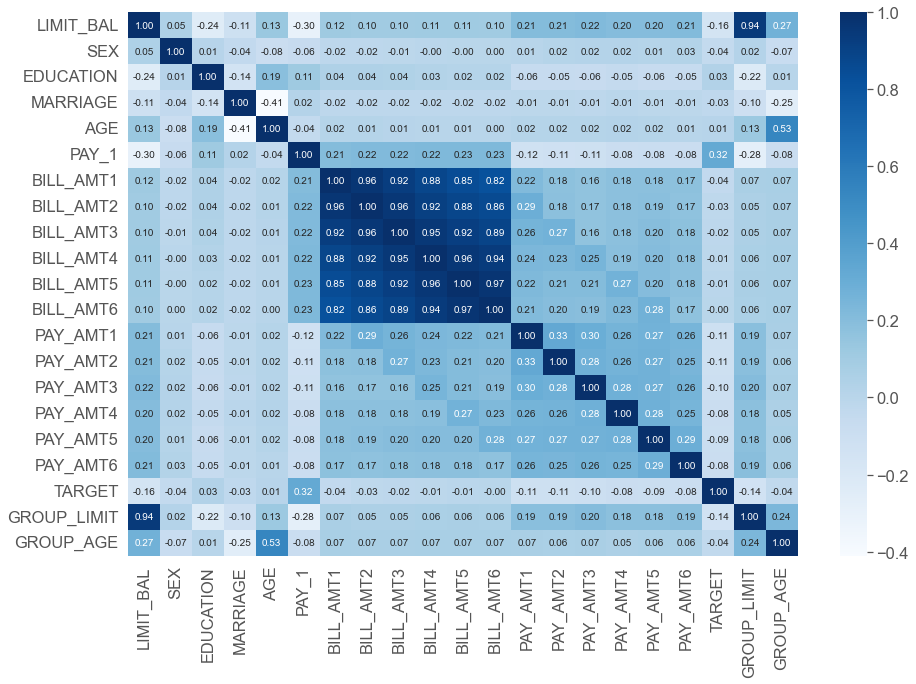

In [83]:
# Matriz de correlação.
corr_df = df3.corr()

# Plotagem.
sns.heatmap(corr_df, 
            cmap = 'Blues', 
            annot = True, 
            fmt = '.2f');

- As variáveis **`BILL_AMT`** estão altamente correlacionadas entre si, o que pode indicar um problema de multicolinearidade.

- As variáveis **`BILL_AMT`** estão pouco correlacionadas com as variáveis **`PAY_AMT`**, o que significa que a maioria dos clientes não estão pagando o valor exato de suas faturas.

Considerando a análise de correlação, iremos desconsiderar as seguintes variáveis:

- **`LIMIT_BAL`** e **`AGE`**: representadas por **`GROUP_LIMIT`** e **`GROUP_AGE`**.
- **`SEX`** e **`MARRIAGE`**: não são significativas.
- **`BILL_AMT2`** até **`BILL_AMT6`**: estão altamente correlacionadas.
- Para as variáveis de pagamentos **`PAY_AMT`**, utilizaremos apenas as três primeiras, pois também estão correlacionadas.

Além dessas, também deixaremos de fora as variáveis:

- **`ID`**: por se tratar apenas do código de identificação da conta.
- **`PAY_2`** até **`PAY_6`**: já excluídas por conta de dados inválidos.

In [84]:
# Variáveis removidas.
del_vars = ['LIMIT_BAL',
            'AGE',
            'SEX',
            'MARRIAGE',
            'BILL_AMT2',
            'BILL_AMT3',
            'BILL_AMT4',
            'BILL_AMT5',
            'BILL_AMT6',
            'PAY_AMT4',
            'PAY_AMT5',
            'PAY_AMT6',
            'ID']

In [85]:
# Melhores variáveis.
best_vars = [item for item in df3.columns if item not in del_vars]
best_vars

['EDUCATION',
 'PAY_1',
 'BILL_AMT1',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'TARGET',
 'GROUP_LIMIT',
 'GROUP_AGE']

In [86]:
# Seleção de variáveis.
df4 = df3[best_vars]

In [87]:
# Visualizando o dataframe.
df4.head()

,EDUCATION,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET,GROUP_LIMIT,GROUP_AGE
0,2,2,782.6,0.0,137.8,0.0,1,1,1
1,2,-1,536.4,0.0,200.0,200.0,1,1,2
2,2,0,5847.8,303.6,300.0,200.0,0,1,2
3,2,0,9398.0,400.0,403.8,240.0,0,1,2
4,2,-1,1723.4,400.0,7336.2,2000.0,0,1,2


## 4. Pré-Processamento dos Dados

Nessa etapa, iremos preparar os dados para a etapa da modelagem preditiva. 

<a href='https://medium.com/@rafaelfelippe_/pr%C3%A9-processamento-de-dados-com-python-d2c607d134f'>Neste link</a>, explico com mais detalhes sobre as principais técnicas de pré-processamento utilizando a linguagem Python.

### 4.1 Divisão Treino/Teste

Vamos dividir os dados em dois grupos, um para treinar os modelos e outro para testá-los.

Atribuíremos uma divisão 70/30.

In [88]:
# Separando os dados.
X = df4.loc[:, df4.columns != 'TARGET']
y = df4['TARGET']

In [89]:
# Divisão treino/teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [90]:
# Dimensão dos conjuntos.
print('Exemplos de Treino: {}'.format(len(X_train)))
print('Exemplos de Teste: {}'.format(len(X_test)))

Exemplos de Treino: 16800
Exemplos de Teste: 7201


### 4.2 Balanceamento de Classes

Como esse é um problema de classificação e temos mais registros de uma classe do que de outra, essa tarefa ajuda o algoritmo a aprender sobre ambas as classes "de maneira igual".

Para nos auxiliar nessa tarefa utilizaremos uma técnica chamada *SMOTE*, que resumidamente, cria registros sintéticos da classe minoritária (clientes inadimplentes).

In [91]:
# Instanciando a classe.
smt = SMOTE()

O balanceamento de classes é feito apenas nos dados de treino.

In [92]:
# Aplicando o balanceamento.
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [93]:
# Dimensão do dataframe.
X_train_smt.shape

(25844, 8)

In [94]:
# Contagem de registros.
y_train_smt.value_counts()

1    12922
0    12922
Name: TARGET, dtype: int64

### 4.3 Padronização dos Dados

A padronização é o processo de redimensionamento das variáveis para que elas tenham as propriedades de uma distribuição normal, ou seja, com a média igual a 0 e desvio padrão igual a 1.

Uma forma de padronizar os dados é através do método *StandardScaler*, que utilizaremos a seguir.

In [95]:
# Instanciando o objeto.
scaler = StandardScaler()

In [96]:
# Padronizando as variáveis.
X_train_sc = scaler.fit_transform(X_train_smt)
X_test_sc = scaler.transform(X_test)

Devemos normalizar/padronizar os conjuntos de forma individual para que não haja "vazamento" de informações.

## 5. Modelagem Preditiva

### 5.1 Seleção de Algoritmos

Nesta etapa, vamos testar o desempenho de alguns algoritmos utilizados para problemas de classificação, são eles:

- <a href='https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>LogisticRegression</a>
- <a href='https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html'>LDA - Linear Discriminant Analysis</a>
- <a href='https://scikitlearn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>KNeighborsClassifier</a>
- <a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>DecisionTreeClassifier</a>
- <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>RandomForestClassifier</a>

Para isso, vamos criar uma função onde treinaremos os modelos atráves da validação cruzada. 

Esse método irá dividir o conjunto de treinamento em 5 *folds* e para cada *fold*, o modelo usará uma parte dos dados para o treinamento e uma para o teste.  

Ao final do processo, teremos um *score* de como os modelos performaram.

In [97]:
# Criando a função.
def classifiersTraining(features, tTarget, printMeans = True, scoring = 'accuracy'):
    
    # Número de folds.
    num_folds = 5
    
    # Listas para armazenar informações.
    models = [] 
    results = [] 
    names = [] 
    means = pd.DataFrame(columns = ['mean'])

    # Modelos testados.
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))

    # Avaliação dos modelos.
    for name, model in models:
        skf = StratifiedKFold(n_splits = num_folds)
        cv_results = cross_val_score(model, features, tTarget, cv = skf, scoring = scoring)
        results.append(cv_results)
        names.append(name)

        # Adicionando os resultados gerados pelo modelo ao dataframe.
        means = means.append(pd.DataFrame(data = [[cv_results.mean()]], 
                                          columns = ['mean'], 
                                          index   = [name]))

        # Imprime a mensagem contendo os resultados obtidos.
        if printMeans:
            msg = '%s: %f' % (name, cv_results.mean())
            print(msg)

    # Salva os resultados em um dataframe.
    results = pd.DataFrame(np.transpose(results), columns = names)

    # Retorna o dataframe com os resultados.
    return (results, means)

In [98]:
# Avaliando os modelos.
results = classifiersTraining(features = X_train_sc, tTarget = y_train_smt)

LR: 0.685227
LDA: 0.687123
KNN: 0.739012
CART: 0.739554
RF: 0.801657


Acima temos as médias das acurácias para cada um dos algoritmos. 

Considerando apenas essa métrica, os algoritmos se saíram bem, sendo que o *RandomForestClassifier* apresentou o melhor desempenho.

Sendo assim, seguiremos com ele!

### 5.2 RandomForest - Modelo 1

Esse será um modelo *baseline*, ou seja, utilizaremos os hiperparâmetros padrões do algoritmo e posteriormente poderemos compará-lo com uma versão otimizada do modelo.  

Para mais informações sobre o funcionamento desse algortimo acesse <a href='https://medium.com/@rafaelfelippe_/floresta-aleat%C3%B3ria-random-florest-f9b415d582a2'>este link</a> em meu blog de estudos.

In [99]:
# Instanciando o modelo.
classifierRF = RandomForestClassifier()

Começaremos definindo uma função, que irá treinar o modelo com dados de treino, e em seguida irá realizar a validação cruzada.

Aqui, já poderíamos utilizar o conjunto de teste, porém, deixaremos esse conjunto de lado para utilizá-lo apenas quando tivermos um modelo pronto.

Sendo assim, podemos utilizar a função *cross_val_predict* que realiza a validação cruzada *K-fold*, e nos retorna as previsões feitas em cada parte.

Isso significa que teremos uma previsão "limpa" para cada instância no conjunto de treino, ou seja, a previsão é feita por um modelo que nunca viu os dados durante o treinamento.

In [100]:
# Criando a função.
def classifiermodel(model, X_train, y_train):
    
    # Treinamento do modelo.
    model = model.fit(X_train, y_train) 
    
    # Regra da validação cruzada.
    skf = StratifiedKFold(n_splits = 5)
    
    # Previsões obtidas na validação cruzada.
    y_train_pred = cross_val_predict(model, X_train, y_train, cv = skf)
    
    # Métricas de desempenho.
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred) 
    f1 = f1_score(y_train, y_train_pred)
    conf = confusion_matrix(y_train, y_train_pred, labels = [1, 0])
    
    print('Modelo:', model)
    print('Acurácia do modelo:', (accuracy) * 100, '%')
    print('Precision do Modelo:', (precision) * 100, '%')
    print('Recall do modelo:', (recall) * 100, '%')
    print('F1 score:', (f1) * 100, '%')
    print('Matriz de Confusão:\n',  (conf))

In [101]:
# Aplicando a função.
classifiermodel(classifierRF, X_train_sc, y_train_smt)

Modelo: RandomForestClassifier()
Acurácia do modelo: 80.39777124284167 %
Precision do Modelo: 80.00305530094714 %
Recall do modelo: 81.0555641541557 %
F1 score: 80.52587068501576 %
Matriz de Confusão:
 [[10474  2448]
 [ 2618 10304]]


Acima temos as métricas do modelo, a matriz de confusão nos diz o seguinte:

- 10.474 registros da classe 1 foram classificados corretamente.
- 2.448 registros da classe 1 foram classificados erroneamente para a classe 0.
- 2.618 registros da classe 0 foram classificados erroneamente para a classe 1.
- 10.304 registros da classe 0 foram classificados corretamente.

Em relação as métricas temos:

- **Acurácia**: indica uma performance geral do modelo, dentre todas as classificações, quantas o modelo classificou corretamente.
    - 20.778 (10.474 + 10.304) / 25.844 (total) = 80,39%. 
    
    
- **Precision**: dentre todas as previsões realizadas para uma classe, quantas o modelo acertou.
    - 10.474 / 13.092 (10.474 + 2.618) = 80% (classe 1).
    
    
- **Recall**: dentre todos os registros reais de uma classe, quantos foram classificados corretamente.
    - 10.474 / 12.922 (10.474 + 2.448) = 81,05% (classe 1).   
    

- **F1-score**: média harmônica entre *precision* e *recall*.

Agora, vamos apresentar os dados de teste para esse modelo!

In [102]:
# Previsões com dados de teste.
y_pred = classifierRF.predict(X_test_sc)

Para obter as métricas da performance com os dados de teste, podemos utilizar a função *classification_report*.

In [103]:
# Avaliação do modelo.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      5569
           1       0.45      0.55      0.49      1632

    accuracy                           0.74      7201
   macro avg       0.65      0.68      0.66      7201
weighted avg       0.77      0.74      0.75      7201



In [104]:
# Matriz de confusão
conf_test = confusion_matrix(y_test, y_pred, labels = [1, 0])
print('Matriz de Confusão:\n', (conf_test))

Matriz de Confusão:
 [[ 899  733]
 [1104 4465]]


Podemos concluir que o modelo possui uma maior performance ao classificar amostras da classe 0.

Para um segundo ciclo do projeto, seria interessante treinar o modelo com uma base de dados maior.

### 5.3 RandomForest - Modelo 2

Vamos iniciar a otimização do modelo *RandomForest*.

Para isso, vamos utilizar a classe *GridSearchCV*.

Essa ferramenta é usada para automatizar o processo de ajuste dos hiperparâmetros de um algoritmo.

In [105]:
# Instanciação do modelo.
classifierRF_2 = RandomForestClassifier()

Criaremos um dicionário contendo os valores que iremos avaliar para cada hiperparâmetro.

In [106]:
# Dicionário de parâmetros.
param_grid = [{'n_estimators': [100, 500, 1000], 
               'max_features': ['auto', 'sqrt', 'log2']},
              {'bootstrap': [False], 
               'n_estimators': [100, 500, 1000], 
               'max_features': ['auto', 'sqrt', 'log2']}]

Também criaremos um dicionário contendo as métricas para avaliar o modelo.

In [107]:
# Métricas de desempenho.
dic_scores = {'accuracy' :make_scorer(accuracy_score),
              'recall'   :make_scorer(recall_score),
              'precision':make_scorer(precision_score),
              'f1'       :make_scorer(f1_score)}

Com isso, podemos instanciar o objeto da classe *GridSearchCV*.

In [108]:
# Instanciando a classe.
grid_search = GridSearchCV(classifierRF_2, 
                           param_grid, 
                           scoring = dic_scores, 
                           refit = 'f1', 
                           cv = 5)

Observe que definimos o estimador, e especificamos os dicionários de hiperparâmetros e métricas.

Além disso, definimos *refit = f1*, para que o *GridSearchCV* saiba qual métrica utilizar para avaliar os conjuntos de hiperparâmetros.

In [109]:
# Busca pelos melhores hiperparâmetros.
grid_search.fit(X_train_sc, y_train_smt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 500, 1000]},
                         {'bootstrap': [False],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 500, 1000]}],
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

Com a busca finalizada, podemos visualizar as métricas para cada combinação de valores.

In [110]:
# Resultado da otimização.
pd.DataFrame(grid_search.cv_results_)[['params', 
                                       'mean_test_accuracy', 
                                       'mean_test_recall', 
                                       'mean_test_precision', 
                                       'mean_test_f1']]

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'max_features': 'auto', 'n_estimators': 100}",0.806184,0.813667,0.800359,0.804971
1,"{'max_features': 'auto', 'n_estimators': 500}",0.806068,0.814518,0.799476,0.804936
2,"{'max_features': 'auto', 'n_estimators': 1000}",0.806068,0.816144,0.798411,0.805173
3,"{'max_features': 'sqrt', 'n_estimators': 100}",0.804250,0.809875,0.799426,0.802577
4,"{'max_features': 'sqrt', 'n_estimators': 500}",0.804869,0.813358,0.798294,0.803739
5,"{'max_features': 'sqrt', 'n_estimators': 1000}",0.806146,0.815602,0.798890,0.805212
6,"{'max_features': 'log2', 'n_estimators': 100}",0.806223,0.815680,0.798924,0.805044
7,"{'max_features': 'log2', 'n_estimators': 500}",0.807616,0.817614,0.800078,0.806751
8,"{'max_features': 'log2', 'n_estimators': 1000}",0.809899,0.822258,0.800943,0.809424
9,"{'bootstrap': False, 'max_features': 'auto', '...",0.804869,0.810341,0.800207,0.802799


In [111]:
# Melhor combinação.
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 1000}

Vamos atribuir essa combinação a um novo modelo.

In [112]:
# Modelo otimizado.
classifierRF_2 = grid_search.best_estimator_

Por fim, vamos verificar seu desempenho.

In [113]:
# Previsões com dados de teste.
y_pred_2 = classifierRF_2.predict(X_test_sc)

In [114]:
# Avaliação do modelo.
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      5569
           1       0.45      0.55      0.50      1632

    accuracy                           0.75      7201
   macro avg       0.66      0.68      0.66      7201
weighted avg       0.77      0.75      0.76      7201



In [115]:
# Matriz de confusão.
conf_test_2 = confusion_matrix(y_test, y_pred_2, labels = [1, 0])
print('Matriz de Confusão:\n', (conf_test_2))

Matriz de Confusão:
 [[ 899  733]
 [1088 4481]]


Parece que a otimização dos hiperparâmetros não gerou tanta mudança na performance do modelo.

In [116]:
# Probabilidade de previsão para cada registro.
y_test_predict_proba = classifierRF_2.predict_proba(X_test_sc)
y_test_predict_proba = pd.DataFrame(y_test_predict_proba)
y_test_predict_proba

,0,1
0,0.539,0.461
1,0.950,0.050
2,0.987,0.013
3,0.816,0.184
4,0.598,0.402
...,...,...
7196,0.800,0.200
7197,0.867,0.133
7198,0.908,0.092
7199,0.328,0.672


Vamos comparar a curva ROC AUC dos modelos.

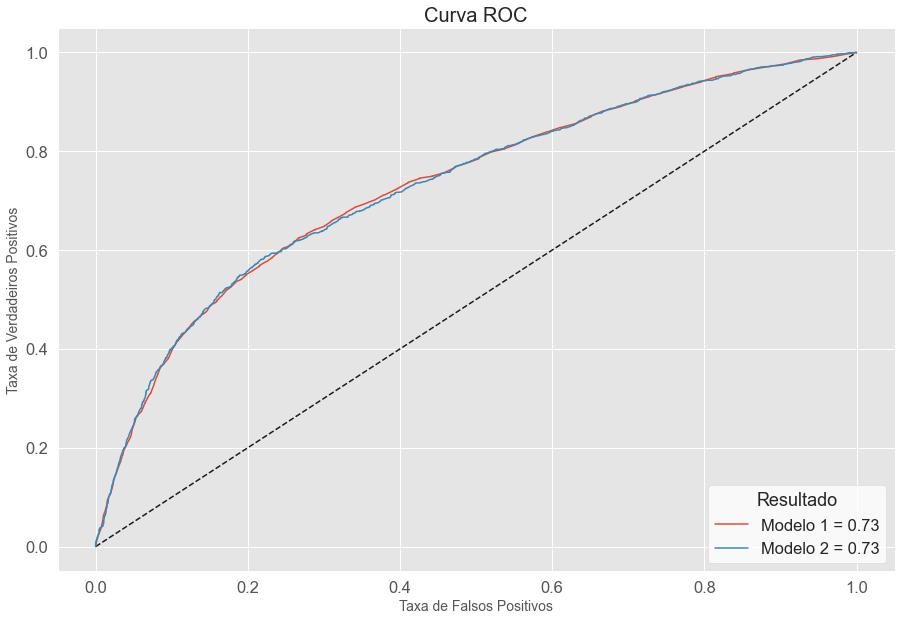

In [117]:
# Curva ROC AUC.

# Preparação dos dados.
y_pred_proba_RF = classifierRF.predict_proba(X_test_sc)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_RF2 = classifierRF_2.predict_proba(X_test_sc)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_RF2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_RF2)

# Plotagem.
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label = 'Modelo 1 = ' + str(round(auc1, 2)))
plt.plot(fpr2, tpr2, label = 'Modelo 2 = ' + str(round(auc2, 2)))
plt.legend(loc = 4, title = 'Resultado', facecolor = 'white')
plt.xlabel('Taxa de Falsos Positivos', fontsize = 14)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize = 14)
plt.title('Curva ROC', size = 20);

Como vimos, a otimização dos hiperparâmetros não afetou a performance do modelo, sendo assim, o modelo 1 seria o escolhido para a entrega final por se tratar de uma versão mais "simplificada".

Para um segundo ciclo do projeto, poderíamos coletar mais dados, realizar uma maior otimização dos hiperparâmetros, ou mesmo treinar e avaliar outros algoritmos de classificação.

Com isso, finalizamos a etapa de modelagem preditiva.

## 6. Conclusões Finais

Os dois modelos avaliados apresentaram bons resultados, porém, como dito, o modelo 1 foi o escolhido por ser mais "simples".  

Para a entrega do modelo ao cliente, teríamos que considerar alguns cenários:

- Cenário 1: o cliente não tem qualquer experiência com Machine Learning.
- Cenário 2: o cliente já possui uma infraestrutura e equipe capacitada.


Para o cenário 1, poderíamos: 

- Entregar as previsões em um arquivo "csv", contendo as colunas de ID's dos clientes e as probabilidades de inadimplência.

- Publicar o modelo em nuvem e entregá-lo como uma API.

- Alimentar uma aplicação web para que o cliente consiga utilizar o modelo da forma mais simples possível.


Para o cenário 2, poderíamos: 

- Salvar o modelo em disco e enviar para a equipe do cliente.

- Entregar o modelo como um container *Docker* que pode ser incorporado a infra do cliente. 

- Entregar a equipe um pipeline de dados, passando por todas as fases, desde a coleta dos dados até as previsões do modelo. 



Podemos ainda entregar o projeto não como previsões, mas como uma consultoria, indicando ao cliente que ações tomar com base nas previsões do modelo e na análise do mercado em geral. A entrega do modelo deve ser definida no início do projeto. Algumas opções listadas acima envolvem o trabalho de outras áreas, o que pode encarecer o projeto.